# Image Classification
* Date: 15/12/2021
* Type of Model: TSR (Classification)

### Metadata
* Dataset: Traffic sign recognization
* Size of training set:31367
* Size of testing set : 7842
* Size of validation set : 12630
* Number of class :43 
* Original Model: CNN

### Outcome
* Accuracy of model: 0.95


# 1.0 Prepare Environment

In [4]:
"""Description : import packages"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# 2.0 Data loading and Preprocessing

###  2.1 Preprocess all training images into a numpy array

In [5]:
data = [] 
labels = [] 
classes = 43
cur_path = os.getcwd()

for i in tqdm(range(classes)):
    path = cur_path + '\\' + str('Train') + '\\' + str(i)+'\\'
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error:Image Not Loaded")

  0%|          | 0/43 [00:00<?, ?it/s]

In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

### 2.2 Splitting the training and testing datasets

In [ ]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=66)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 3.0 Model Development and Training

In [11]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [12]:
#Compilation of the model
model.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 151s 154ms/step - loss: 1.1021 - accuracy: 0.6832 - val_loss: 0.3968 - val_accuracy: 0.8988
Epoch 2/15
981/981 [==============================] - 159s 162ms/step - loss: 0.5239 - accuracy: 0.8433 - val_loss: 0.1512 - val_accuracy: 0.9596
Epoch 3/15
981/981 [==============================] - 174s 178ms/step - loss: 0.3616 - accuracy: 0.8919 - val_loss: 0.1122 - val_accuracy: 0.9693
Epoch 4/15
981/981 [==============================] - 159s 162ms/step - loss: 0.3041 - accuracy: 0.9126 - val_loss: 0.1008 - val_accuracy: 0.9714
Epoch 5/15
981/981 [==============================] - 159s 163ms/step - loss: 0.2594 - accuracy: 0.9254 - val_loss: 0.0770 - val_accuracy: 0.9799
Epoch 6/15
981/981 [==============================] - 165s 168ms/step - loss: 0.2750 - accuracy: 0.9232 - val_loss: 0.1238 - val_accuracy: 0.9639
Epoch 7/15
981/981 [==============================] - 157s 160ms/step - loss: 0.2188 - accuracy: 0.9390 - val_loss: 0.0812 -

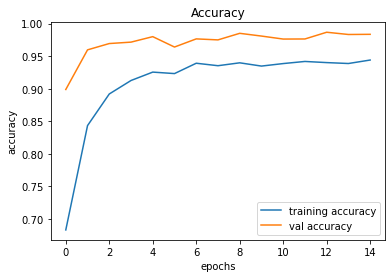

In [15]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

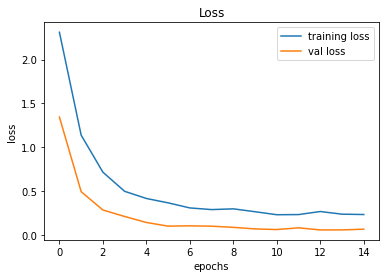

In [11]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# 4 Validate model accuracy

In [12]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
print(imgs.shape)
print(labels.shape)
print(y_test.columns)
 

(12630,)
(12630,)
Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')


In [13]:
y_test.dtypes

Width       int64
Height      int64
Roi.X1      int64
Roi.Y1      int64
Roi.X2      int64
Roi.Y2      int64
ClassId     int64
Path       object
dtype: object

In [14]:
y_test['Path'].unique()

array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png', ...,
       'Test/12627.png', 'Test/12628.png', 'Test/12629.png'], dtype=object)

In [15]:
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [16]:
test_loss, test_acc = model.evaluate( X_test, labels, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9479809999465942
